# Sandbox (development)

In [7]:
%matplotlib notebook

In [1]:
# imports
from matplotlib import pyplot as plt
import numpy as np

from astropy import units
from astropy.table import Table
from astropy.coordinates import SkyCoord

from frb.surveys import survey_utils
from frb import frb

# DES near 180924

In [2]:
frb180924 = frb.FRB.by_name('FRB180924')

In [3]:
search_r = 1 * units.deg

In [4]:
des_srvy = survey_utils.load_survey_by_name('DES', frb180924.coord, search_r)
des_tbl = des_srvy.get_catalog(print_query=True)

SELECT mag_auto_g, magerr_auto_g, mag_auto_r, magerr_auto_r, mag_auto_i, magerr_auto_i, mag_auto_z, magerr_auto_z, mag_auto_y, magerr_auto_y, coadd_object_id, ra, dec, tilename
    FROM des_dr1.main
    WHERE q3c_radial_query(ra,dec,326.105229,-40.900028,1.000000)
    
SELECT w1mpro, w1sigmpro, w2mpro, w2sigmpro, w3mpro, w3sigmpro, w4mpro, w4sigmpro, coadd_object_id, des_ra, des_dec, ra, dec
    FROM des_dr1.des_allwise
    WHERE q3c_radial_query(ra,dec,326.105229,-40.900028,1.000000)
    


## Inspect

In [5]:
des_tbl

DES_g,DES_g_err,DES_r,DES_r_err,DES_i,DES_i_err,DES_z,DES_z_err,DES_Y,DES_Y_err,DES_ID,ra,dec,DES_tile,WISE_W1,WISE_W1_err,WISE_W2,WISE_W2_err,WISE_W3,WISE_W3_err,WISE_W4,WISE_W4_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str12,float64,float64,float64,float64,float64,float64,float64,float64
24.3972,0.25485,22.9723,0.0995838,21.9376,0.0659115,21.5834,0.0736919,21.1184,0.133834,212835321,324.861595,-41.235927,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
22.4551,0.0337882,22.157,0.0371656,22.0062,0.0646035,21.3684,0.059213,22.0598,0.258294,212833823,324.8499,-41.2165,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
23.194,0.0941275,21.9697,0.0437027,21.5887,0.0569069,21.1987,0.0581137,21.1634,0.150334,212835313,324.871578,-41.235802,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
99.0,99.0,99.0,99.0,23.9364,0.253412,23.1386,0.178016,22.8145,0.353177,212835513,324.873778,-41.23811,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
24.8797,0.26971,24.4296,0.255416,24.034,0.328238,23.7537,0.371262,24.2944,1.63749,212835530,324.87687,-41.238287,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
26.0055,0.67688,24.9813,0.377289,24.5795,0.483049,24.5982,0.719402,24.5932,1.91446,212835629,324.875746,-41.239355,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
26.3789,1.36246,24.8452,0.475733,23.641,0.290254,22.8861,0.212203,23.7033,1.20404,212835429,324.875066,-41.237232,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
24.15,0.188705,23.4247,0.139917,22.7707,0.159046,23.1424,0.270389,22.4796,0.409255,212834367,324.850547,-41.22363,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
23.033,0.0665136,22.0977,0.0403119,21.8361,0.0584412,21.9572,0.0956497,21.7806,0.217223,212834632,324.877285,-41.227271,DES2137-4123,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [8]:
gd_r = des_tbl['DES_r'] < 30.

<IPython.core.display.Javascript object>


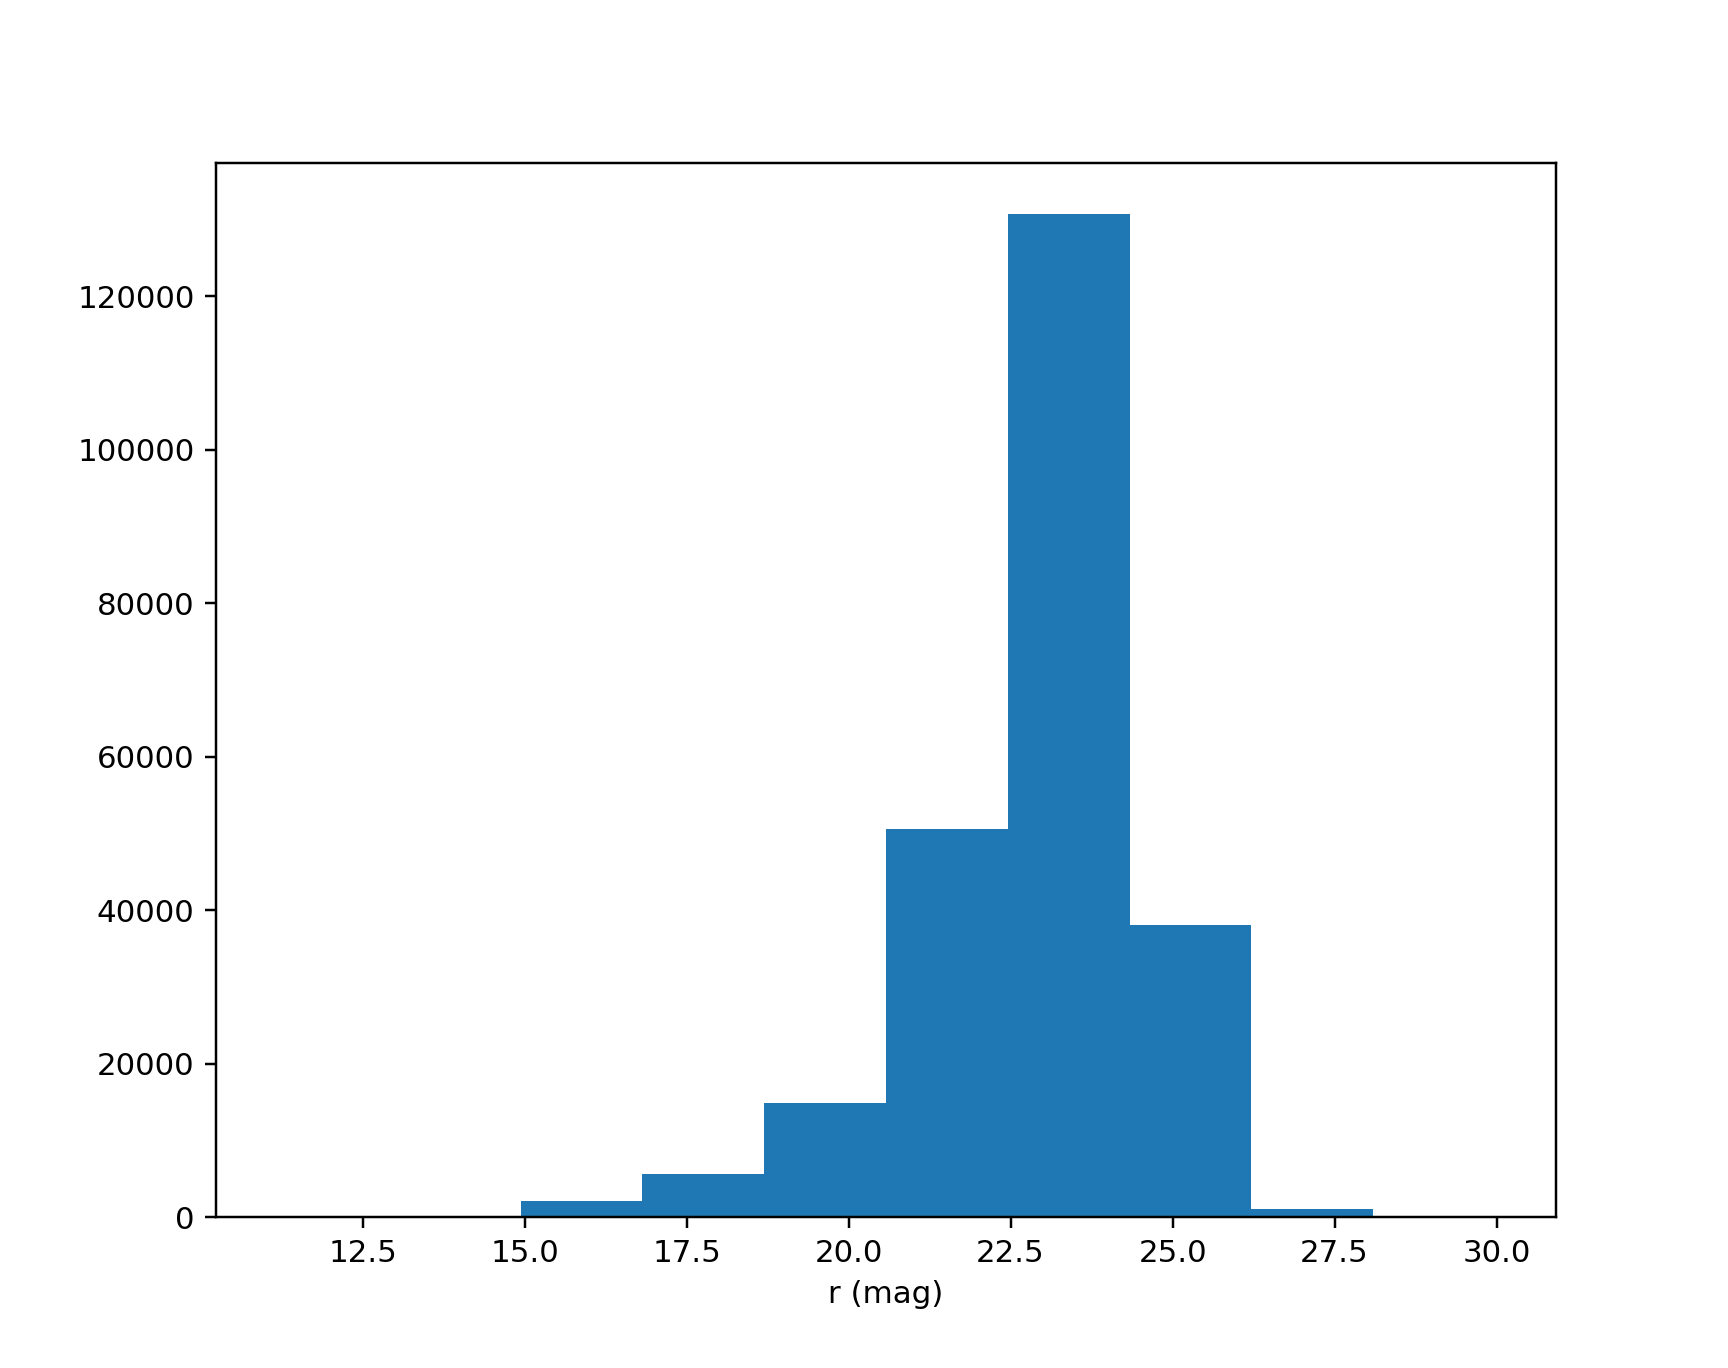

In [10]:
plt.clf()
ax = plt.gca()
ax.hist(des_tbl['DES_r'][gd_r])
# Label
ax.set_xlabel('r (mag)')
plt.show()

# Write

In [17]:
des_tbl.meta['RA'] = frb180924.coord.ra.value
des_tbl.meta['DEC'] = frb180924.coord.dec.value
des_tbl.meta['RSEARCH'] = 1.0

In [18]:
des_tbl.write('tst_DES_180924.fits', overwrite=True)

# Assess with FRBs
    Built by running the test in sandbox.py

In [22]:
sky = Table.read('tst_DES_180924.fits')
frbs = Table.read('tst_FRB_180924.fits')

In [25]:
obj_coords = SkyCoord(ra=sky['ra'], dec=sky['dec'], unit='deg')
frb_coords = SkyCoord(ra=frbs['ra'], dec=frbs['dec'], unit='deg')

In [24]:
theta_max = 6 * units.arcsec

In [32]:
ncands = []
for frb_coord in frb_coords:
    cands = frb_coord.separation(obj_coords)  < theta_max
    ncands.append(np.sum(cands))
ncands = np.array(ncands)
ncands

array([2, 1, 1, 2, 2, 1, 1, 2, 5, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1,
       3, 2, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 4, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1,
       2, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2])

In [33]:
np.sum(ncands > 1)

42